## Purchased  prediction using decision tree

**Importing the libraries**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing the dataset**

In [19]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:
data.shape

(400, 5)

In [21]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [22]:
final=data.drop(['User ID','Gender'],axis=1)
final.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [23]:
X=data[['Age','EstimatedSalary']]
y=data['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train.shape,X_test.shape

((280, 2), (120, 2))

**Feature Scaling**

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier()

# Fit dt to the training set
dt.fit(X_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred = dt.predict(X_test)
y_pred
#print(y_pred[0:5])

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

[Text(0.475, 0.9642857142857143, 'X[0] <= 0.477\ngini = 0.471\nsamples = 280\nvalue = [174, 106]'),
 Text(0.26875, 0.8928571428571429, 'X[1] <= 0.587\ngini = 0.296\nsamples = 199\nvalue = [163, 36]'),
 Text(0.1375, 0.8214285714285714, 'X[0] <= -0.105\ngini = 0.081\nsamples = 165\nvalue = [158, 7]'),
 Text(0.1125, 0.75, 'gini = 0.0\nsamples = 112\nvalue = [112, 0]'),
 Text(0.1625, 0.75, 'X[1] <= -0.075\ngini = 0.229\nsamples = 53\nvalue = [46, 7]'),
 Text(0.1375, 0.6785714285714286, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.1875, 0.6785714285714286, 'X[1] <= 0.385\ngini = 0.384\nsamples = 27\nvalue = [20, 7]'),
 Text(0.1625, 0.6071428571428571, 'X[0] <= -0.008\ngini = 0.355\nsamples = 26\nvalue = [20, 6]'),
 Text(0.05, 0.5357142857142857, 'X[1] <= 0.055\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.025, 0.4642857142857143, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.075, 0.4642857142857143, 'X[1] <= 0.17\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.05,

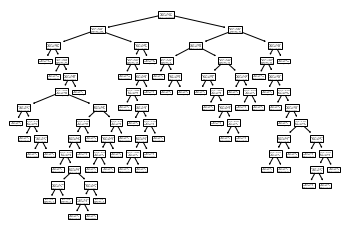

In [27]:
from sklearn import tree
tree.plot_tree(dt)

**Predicting the Test set results**

In [11]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
332,0,0
111,0,1
352,1,1
205,0,1
56,0,0
...,...,...
17,1,1
225,0,0
223,1,1
59,0,1


**Making the Confusion Matrix**

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

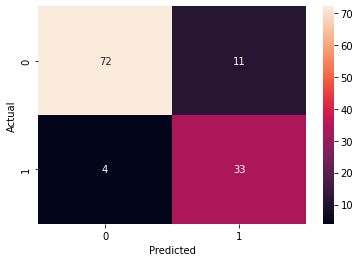

In [12]:
import seaborn as sn # plotting the data
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

Test set accuracy: 0.88
Test set auc: 0.88


c:\users\sivashanmugavadivel\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Train set AUC :  1.0


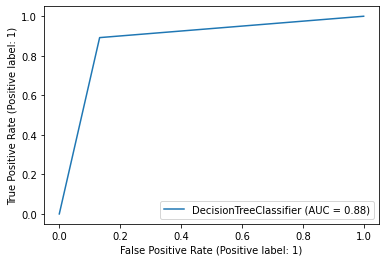

In [13]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dt.predict(X_test) 

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dt, X_test, y_test)


acc = roc_auc_score(y_train, dt.predict(X_train))
print("Train set AUC : ", acc)


In [14]:
##there are 1 param to play with - max depth - to choose the best parameter, I will try different combinations and hoose the one which has the best accuracy/auc/any eval metric on cross-validation or test data-set
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
    dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
    dt.fit(X_train, y_train) # the model is trained
    trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
    dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
    valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.8321428571428572  Cross val score :  0.8214285714285714
Depth  :  2  Training Accuracy :  0.9178571428571428  Cross val score :  0.9142857142857143
Depth  :  3  Training Accuracy :  0.9178571428571428  Cross val score :  0.9071428571428571
Depth  :  4  Training Accuracy :  0.9321428571428572  Cross val score :  0.8964285714285714
Depth  :  5  Training Accuracy :  0.9464285714285714  Cross val score :  0.8714285714285716
Depth  :  6  Training Accuracy :  0.9535714285714286  Cross val score :  0.8714285714285716
Depth  :  7  Training Accuracy :  0.9607142857142857  Cross val score :  0.8571428571428571
Depth  :  8  Training Accuracy :  0.9714285714285714  Cross val score :  0.8607142857142858
Depth  :  9  Training Accuracy :  0.9785714285714285  Cross val score :  0.8571428571428571
Depth  :  10  Training Accuracy :  0.9892857142857143  Cross val score :  0.8464285714285715
Depth  :  20  Training Accuracy :  1.0  Cross val score :  0.8357142857142857
